In [376]:

import os
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt






In [377]:
dataset_path = 'C:/Users/MAKOS/Desktop/Machine_Learning/uganda_traffic_forecasting.csv'
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}")
data = pd.read_csv(dataset_path)

In [378]:
print(f"Dataset loaded with {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset loaded with 1538 rows and 11 columns.


In [379]:
data.head(30)

,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
0,2023-01-01 03:00:00,ENT002,23.0,40.72036861283745,Clear,Thursday,0.0,Parade,FAIL,Good,0.0
1,2023-01-01 03:15:00,GUL004,15.0,37.87791030098848,Rainy,Tuesday,0.0,Parade,FAIL,Poor,1.0
2,2023-01-01 03:30:00,GUL004,21.0,30.480815399777644,Clear,Saturday,1.0,Marathon,OK,Moderate,2.0
3,2023-01-01 03:45:00,MBR003,25.0,40.774805185188626,Rainy,Monday,0.0,NaN,UNKNOWN,???,0.0
4,2023-01-01 04:00:00,GUL004,15.0,42.57752540142751,Snowy,Friday,0.0,Marathon,OK,Moderate,1.0
5,2023-01-01 04:30:00,ENT002,19.0,43.341764172448976,Foggy,Wednesday,0.0,NaN,UNKNOWN,Good,3.0
6,2023-01-01 04:45:00,MBR003,21.0,38.44740951175251,Clear,Friday,1.0,Parade,OK,Poor,2.0
7,2023-01-01 05:00:00,KLA001,17.0,20.92192442122609,Rainy,Friday,0.0,Accident,FAIL,Moderate,4.0
8,2023-01-01 05:15:00,ENT002,19.0,31.39614989220498,Foggy,Thursday,0.0,Accident,FAIL,Moderate,2.0
9,2023-01-01 05:30:00,KLA001,16.0,35.863944665783556,Snowy,Saturday,1.0,Accident,FAIL,Good,4.0


In [380]:
data.sample(1000)


,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
1324,2023-01-15 18:00:00,MBR003,11.0,30.993286174875198,Snowy,Thursday,0.0,Parade,OK,Poor,0.0
1012,2023-01-12 08:30:00,GUL004,22.0,45.72006278300473,Foggy,Tuesday,1.0,Accident,UNKNOWN,Good,3.0
231,2023-01-03 15:15:00,KLA001,15.0,59.114190871397234,Foggy,Thursday,0.0,Parade,UNKNOWN,Good,0.0
87,2023-01-02 02:00:00,KLA001,22.0,38.14154247807253,Snowy,Sunday,0.0,Accident,OK,Moderate,3.0
941,2023-01-11 13:30:00,GUL004,16.0,19.349169537436794,Clear,Saturday,0.0,NaN,UNKNOWN,Good,4.0
...,...,...,...,...,...,...,...,...,...,...,...
205,2023-01-03 08:30:00,GUL004,14.0,32.27340554729176,Clear,Thursday,1.0,Accident,OK,Good,1.0
630,2023-01-08 02:30:00,ENT002,25.0,43.73348559711398,Clear,Monday,0.0,Parade,OK,Moderate,1.0
1137,2023-01-13 16:45:00,KLA001,19.0,45.711794062192084,Clear,Tuesday,1.0,Parade,OK,Good,1.0
939,2023-01-11 13:00:00,GUL004,10.0,20.245122287828625,Foggy,Monday,0.0,Marathon,FAIL,Poor,0.0


In [381]:
buffer = io.StringIO()
data.info(buf=buffer, show_counts=True)
print(buffer.getvalue())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                1537 non-null   object
 1   location_id              1534 non-null   object
 2   vehicle_count            1536 non-null   object
 3   avg_speed                1537 non-null   object
 4   weather                  1533 non-null   object
 5   day_of_week              1533 non-null   object
 6   is_holiday               1534 non-null   object
 7   event                    1155 non-null   object
 8   sensor_status            1538 non-null   object
 9   road_condition           1536 non-null   object
 10  target_congestion_level  1537 non-null   object
dtypes: object(11)
memory usage: 132.3+ KB



In [382]:
info_tbl = pd.DataFrame({
    "column": data.columns,
    "non‑null count": data.notna().sum(),
    "dtype": data.dtypes.astype(str)
    })

info_tbl = info_tbl.set_index("column")
info_tbl["non‑null count"] = info_tbl["non‑null count"].astype(int)
info_tbl = info_tbl.sort_values(by="non‑null count", ascending=False)

info_tbl = info_tbl.rename(columns={"column": "Column", "non‑null count": "Non-null Count", "dtype": "Data Type"})
print(info_tbl)
info_tbl = info_tbl.reset_index()

                         Non-null Count Data Type
column                                           
sensor_status                      1538    object
avg_speed                          1537    object
timestamp                          1537    object
target_congestion_level            1537    object
vehicle_count                      1536    object
road_condition                     1536    object
location_id                        1534    object
is_holiday                         1534    object
weather                            1533    object
day_of_week                        1533    object
event                              1155    object


In [383]:
data[data.duplicated()]

,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
1417,2023-01-07 22:45:00,MBR003,21.0,42.127397758576606,Foggy,Saturday,0.0,NaN,OK,Poor,3.0
1431,2023-01-07 17:15:00,ENT002,24.0,30.521072827310135,Clear,Monday,1.0,Accident,FAIL,Poor,1.0
1439,2023-01-07 05:45:00,MBR003,31.0,29.33765068100775,Clear,Saturday,0.0,Marathon,UNKNOWN,Good,3.0
1447,2023-01-08 10:15:00,MBR003,22.0,50.57368305378225,Snowy,Friday,0.0,NaN,UNKNOWN,Poor,1.0
1457,2023-01-05 03:00:00,GUL004,17.0,37.20189657622994,Foggy,Saturday,1.0,Marathon,FAIL,Good,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1533,2023-01-01 15:45:00,MBR003,32.0,42.24216404290793,Rainy,Friday,1.0,Parade,FAIL,Good,3.0
1534,2023-01-07 17:30:00,ENT002,22.0,31.65676954508418,Clear,Monday,1.0,Parade,UNKNOWN,Poor,2.0
1535,2023-01-02 00:30:00,???,17.0,42.34024454353148,Snowy,Tuesday,0.0,Marathon,FAIL,Good,2.0
1536,2023-01-15 08:45:00,GUL004,19.0,46.80220360476691,Foggy,Saturday,1.0,NaN,OK,Moderate,4.0


In [384]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level


In [385]:
missing_value_placeholders = ['N/A', '???', '-', 'NULL', '']
# Replace these placeholders with numpy.nan
data = data.replace(missing_value_placeholders, np.nan)

categorical_cols= ['event','day_of_week','weather','road_condition']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print("Categorical features one-hot encoded.")
data_encoded.head(10)


Categorical features one-hot encoded.


,timestamp,location_id,vehicle_count,avg_speed,is_holiday,sensor_status,target_congestion_level,event_Marathon,event_Parade,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,weather_Foggy,weather_Rainy,weather_Snowy,road_condition_Moderate,road_condition_Poor
0,2023-01-01 03:00:00,ENT002,23.0,40.72036861283745,0.0,FAIL,0.0,False,True,False,False,False,True,False,False,False,False,False,False,False
1,2023-01-01 03:15:00,GUL004,15.0,37.87791030098848,0.0,FAIL,1.0,False,True,False,False,False,False,True,False,False,True,False,False,True
2,2023-01-01 03:30:00,GUL004,21.0,30.480815399777644,1.0,OK,2.0,True,False,False,True,False,False,False,False,False,False,False,True,False
3,2023-01-01 03:45:00,MBR003,25.0,40.774805185188626,0.0,UNKNOWN,0.0,False,False,True,False,False,False,False,False,False,True,False,False,False
4,2023-01-01 04:00:00,GUL004,15.0,42.57752540142751,0.0,OK,1.0,True,False,False,False,False,False,False,False,False,False,True,True,False
5,2023-01-01 04:30:00,ENT002,19.0,43.341764172448976,0.0,UNKNOWN,3.0,False,False,False,False,False,False,False,True,True,False,False,False,False
6,2023-01-01 04:45:00,MBR003,21.0,38.44740951175251,1.0,OK,2.0,False,True,False,False,False,False,False,False,False,False,False,False,True
7,2023-01-01 05:00:00,KLA001,17.0,20.92192442122609,0.0,FAIL,4.0,False,False,False,False,False,False,False,False,False,True,False,True,False
8,2023-01-01 05:15:00,ENT002,19.0,31.39614989220498,0.0,FAIL,2.0,False,False,False,False,False,True,False,False,True,False,False,True,False
9,2023-01-01 05:30:00,KLA001,16.0,35.863944665783556,1.0,FAIL,4.0,False,False,False,True,False,False,False,False,False,False,True,False,False


In [386]:
numeric_cols=['target_congestion_level','vehicle_count','avg_speed','is_holiday']

for col in numeric_cols :
    if col in  data.columns:
        data[col]=pd.to_numeric(data[col],errors='coerce')
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')


In [387]:
data.isnull().sum()

timestamp                    5
location_id                  8
vehicle_count               10
avg_speed                    5
weather                      9
day_of_week                  5
is_holiday                  11
event                      376
sensor_status                4
road_condition               5
target_congestion_level      6
dtype: int64

In [388]:
print("column Name\tpercentage of missing values")
for col in data.columns:
    # Display percentage of missing values with 2 decimal places
    print(f"{data[col].name}           {data[col].isnull().sum() / data.shape[0] * 100:.2f}%")
    print(data[col].isnull().sum(), "missing values ")
data.dtypes

column Name	percentage of missing values
timestamp           0.34%
5 missing values 
location_id           0.55%
8 missing values 
vehicle_count           0.68%
10 missing values 
avg_speed           0.34%
5 missing values 
weather           0.61%
9 missing values 
day_of_week           0.34%
5 missing values 
is_holiday           0.75%
11 missing values 
event           25.65%
376 missing values 
sensor_status           0.27%
4 missing values 
road_condition           0.34%
5 missing values 
target_congestion_level           0.41%
6 missing values 


timestamp                  datetime64[ns]
location_id                        object
vehicle_count                     float64
avg_speed                         float64
weather                            object
day_of_week                        object
is_holiday                        float64
event                              object
sensor_status                      object
road_condition                     object
target_congestion_level           float64
dtype: object

In [389]:
empty_cell_rows = data[data.isnull().any(axis=1)]
empty_cell_rows.head(30)

,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
3,2023-01-01 03:45:00,MBR003,25.0,40.774805,Rainy,Monday,0.0,NaN,UNKNOWN,NaN,0.0
5,2023-01-01 04:30:00,ENT002,19.0,43.341764,Foggy,Wednesday,0.0,NaN,UNKNOWN,Good,3.0
16,2023-01-01 07:15:00,MBR003,NaN,35.288753,Snowy,Tuesday,0.0,Marathon,UNKNOWN,Poor,1.0
19,2023-01-01 08:00:00,KLA001,13.0,27.128364,Clear,Wednesday,1.0,NaN,OK,Poor,3.0
21,2023-01-01 08:30:00,ENT002,25.0,NaN,Rainy,Tuesday,0.0,Accident,OK,Poor,1.0
24,2023-01-01 09:15:00,KLA001,23.0,11.678444,Clear,Friday,0.0,NaN,OK,Moderate,1.0
25,2023-01-01 09:30:00,ENT002,24.0,35.488411,Snowy,Saturday,1.0,NaN,OK,Poor,0.0
30,2023-01-01 11:15:00,MBR003,14.0,36.114792,Clear,Tuesday,0.0,NaN,OK,Poor,4.0
39,2023-01-01 13:30:00,GUL004,28.0,40.589842,Clear,Monday,1.0,NaN,UNKNOWN,Good,0.0
40,2023-01-01 13:45:00,GUL004,24.0,44.468725,Snowy,Wednesday,1.0,NaN,FAIL,Poor,4.0


In [390]:
# Check for rows with NaN in the 'timestamp' column 

rows_with_nan_in_timestamp = data[data['timestamp'].isnull()]

rows_with_nan_in_timestamp


,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
132,NaT,KLA001,20.0,35.885069,Rainy,Tuesday,1.0,NaN,FAIL,Poor,0.0
460,NaT,KLA001,16.0,18.943531,Snowy,Monday,1.0,Parade,OK,Poor,1.0
499,NaT,GUL004,23.0,17.831812,Rainy,Monday,0.0,Accident,FAIL,Poor,4.0
731,NaT,ENT002,24.0,35.024292,Rainy,Friday,0.0,Parade,UNKNOWN,Poor,1.0
766,NaT,MBR003,25.0,46.549756,Foggy,Friday,1.0,Accident,UNKNOWN,Moderate,3.0


In [391]:
# Fill missing timestamps with a default value(only if the first row is null too) or based on previous values+15mins
indices = data.index.tolist()
for idx_pos in range(1, len(indices)):  # Start from the second row
    curr_idx = indices[idx_pos]
    prev_idx = indices[idx_pos - 1]
    if pd.isna(data.loc[curr_idx, 'timestamp']):
        if pd.notna(data.loc[prev_idx, 'timestamp']):
            data.loc[curr_idx, 'timestamp'] = data.loc[prev_idx, 'timestamp'] + pd.Timedelta(minutes=15)
        else:
            # If the first cell is empty, fill with default value
            data.loc[prev_idx, 'timestamp'] = pd.Timestamp('2023-01-01 00:00:00')
            data.loc[curr_idx, 'timestamp'] = pd.Timestamp('2023-01-01 00:00:00') + pd.Timedelta(minutes=15 * idx_pos)

# Check if the timestamp column has been filled correctly
print(data['timestamp'].isnull().sum(), "missing values in timestamp after filling")

0 missing values in timestamp after filling


In [392]:
rows_with_nan_in_timestamp = data[data['timestamp'].isnull()]
rows_with_nan_in_timestamp


,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level


In [393]:
data.loc[460, 'timestamp']

Timestamp('2023-01-06 04:15:00')

In [394]:
#dropping all rows with NaN in 'location_id' column
data = data.dropna(subset=['location_id'])
data.isnull().sum()

timestamp                    0
location_id                  0
vehicle_count               10
avg_speed                    5
weather                      9
day_of_week                  5
is_holiday                  11
event                      375
sensor_status                4
road_condition               5
target_congestion_level      6
dtype: int64

In [395]:
#filling missing values in vehicle_count column with the mean of specific location_id
for location_id in data['location_id'].unique():
    mean_value = data[data['location_id'] == location_id]['vehicle_count'].mean()
    data.loc[(data['location_id'] == location_id) & (data['vehicle_count'].isnull()), 'vehicle_count'] = mean_value
data.isnull().sum()    

timestamp                    0
location_id                  0
vehicle_count                0
avg_speed                    5
weather                      9
day_of_week                  5
is_holiday                  11
event                      375
sensor_status                4
road_condition               5
target_congestion_level      6
dtype: int64

In [396]:
#filling missing values in is_holiday column with the mode
mode_is_holiday = data['is_holiday'].mode()[0]
data.fillna({'is_holiday': mode_is_holiday})
data.isnull().sum()


timestamp                    0
location_id                  0
vehicle_count                0
avg_speed                    5
weather                      9
day_of_week                  5
is_holiday                  11
event                      375
sensor_status                4
road_condition               5
target_congestion_level      6
dtype: int64

In [397]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(data,
              x='timestamp',
              y='avg_speed',
              title='Interactive Variation of Average Speed Over Time',
              labels={'timestamp_imputed': 'Timestamp', 'avg_speed_imputed': 'Average Speed (km/h)'},
              line_shape='linear', # Connects points with straight lines
              height=500 # Adjust height as needed
             )

# Add original (non-missing) data points as scatter markers
# This helps distinguish between original data and imputed sections
fig.add_trace(go.Scatter(
    x=data['timestamp'],
    y=data['avg_speed'],
    mode='markers',
    name='Original Data Points',
    marker=dict(color='red', size=5)
))

# Customize layout for better readability
fig.update_layout(
    hovermode="x unified", # Show all data for a given X-value on hover
    xaxis_rangeslider_visible=True, # Essential for scrollability/zooming
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    title_font_size=20,
    hoverlabel=dict(bgcolor="white", font_size=12, namelength=-1) # Customize hover tooltip
)

# Show the graph
fig.show()



In [398]:
#process to fill missing values in column using KNNImputer
rows_with_nan_in_avg_speed = data[data['avg_speed'].isnull()]
rows_with_nan_in_avg_speed

,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
21,2023-01-01 08:30:00,ENT002,25.0,NaN,Rainy,Tuesday,0.0,Accident,OK,Poor,1.0
55,2023-01-01 17:45:00,MBR003,16.0,NaN,Clear,Wednesday,0.0,Parade,FAIL,Poor,1.0
803,2023-01-10 01:00:00,KLA001,36.0,NaN,Rainy,Wednesday,0.0,Accident,OK,Moderate,4.0
847,2023-01-10 13:00:00,KLA001,19.0,NaN,Foggy,Thursday,0.0,Accident,OK,Good,2.0
1023,2023-01-12 11:15:00,ENT002,19.0,NaN,Rainy,Wednesday,1.0,Marathon,UNKNOWN,Poor,0.0


In [399]:

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


#  Feature Engineering (Deriving features)
# Making sure 'timestamp' is datetime before extracting features
if not np.issubdtype(data['timestamp'].dtype, np.datetime64):
    data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

data['hour_of_day'] = data['timestamp'].dt.hour
if 'minute_of_hour' not in data.columns:
    data['minute_of_hour'] = data['timestamp'].dt.minute

#identifying columns
# Categorical columns that need one-hot encoding (some have NaNs, some don't)
categorical_cols = []
for col in ['timestamps','location_id','sensor_status','event', 'day_of_week', 'weather', 'road_condition']:
    if col in data.columns:
        categorical_cols.append(col)
# Numerical columns to be included in the imputation process 
numerical_cols = []
for col in ['hour_of_day', 'minute_of_hour', 'target_congestion_level', 'vehicle_count', 'is_holiday', 'avg_speed']:
    if col in data.columns:
        numerical_cols.append(col)



# Preparing  data for Imputation Pipeline 

# Creating a copy of the data to avoid modifying the original data
df_processing = data.copy()

#ensuring that only columns that exist in the DataFrame are selected
features_for_imputation = numerical_cols + categorical_cols
features_for_imputation = [col for col in features_for_imputation if col in df_processing.columns]



df_imputer_input = df_processing[features_for_imputation].copy()

#  Preparing data for Imputation Pipeline 

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True)),  # ← add_indicator=True is required for inverse_transform
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_pipe = Pipeline([
      ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=5))                          # ← KNN for numeric features
])


# Building the Preprocessing and Imputation Pipeline 

preprocessor = ColumnTransformer([
    ('cat', categorical_pipe, categorical_cols ),
    ('num', numerical_pipe, numerical_cols)         
])

imputed_data_array = preprocessor.fit_transform(df_imputer_input)


# Post-Imputation Processing and DataFrame Reconstruction 

encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
imputer = preprocessor.named_transformers_['cat'].named_steps['imputer']

# One-hot encoded feature names
indicator_indices = imputer.indicator_.features_
indicator_feature_names = [f"{categorical_cols[i]}_missing" for i in indicator_indices]

categorical_with_indicators = categorical_cols + indicator_feature_names
onehot_feature_names = encoder.get_feature_names_out(categorical_with_indicators).tolist()

# Indicator column names
all_cat_feature_names = onehot_feature_names + indicator_feature_names


all_imputed_column_names = onehot_feature_names + numerical_cols

# Ensure the number of columns matches the shape of imputed_data_array
imputed_df_processed = pd.DataFrame(imputed_data_array, columns=all_imputed_column_names, index=df_imputer_input.index)

temp_onehot_df = imputed_df_processed[onehot_feature_names].round().astype(int)

inverse_transformed_categories_array = encoder.inverse_transform(temp_onehot_df)

inverse_transformed_categories_df = pd.DataFrame(
    inverse_transformed_categories_array,
    columns=categorical_with_indicators,
    index=imputed_df_processed.index
)

df_cleaned = data[['timestamp']].copy()

# Add the imputed numerical columns (average_speed, hour_of_day, minute_of_hour)

for col in numerical_cols:
    if col in imputed_df_processed.columns:
        df_cleaned[col] = imputed_df_processed[col]
    else:
        print(f"Warning: Column '{col}' not found in imputed_df_processed, skipping.")


# Add the re-converted categorical columns
for col in categorical_cols:
    df_cleaned[col] = inverse_transformed_categories_df[col]




print("\nMissing values after imputation:")
print(df_cleaned.isnull().sum())




Missing values after imputation:
timestamp                  0
hour_of_day                0
minute_of_hour             0
target_congestion_level    0
vehicle_count              0
is_holiday                 0
avg_speed                  0
location_id                0
sensor_status              0
event                      0
day_of_week                0
weather                    0
road_condition             0
dtype: int64


Generating Histograms for Numerical Features...


<Figure size 1500x2000 with 0 Axes>

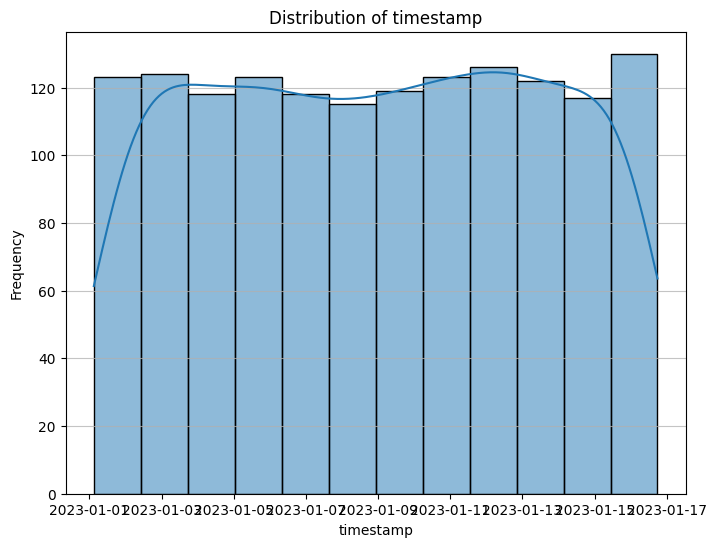

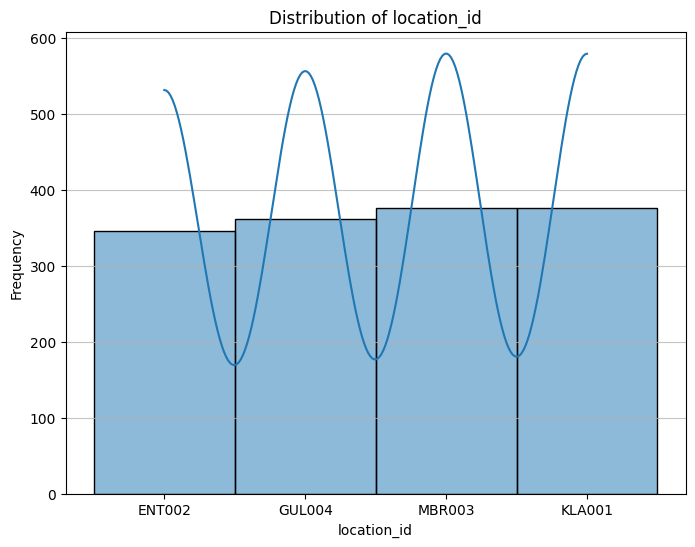

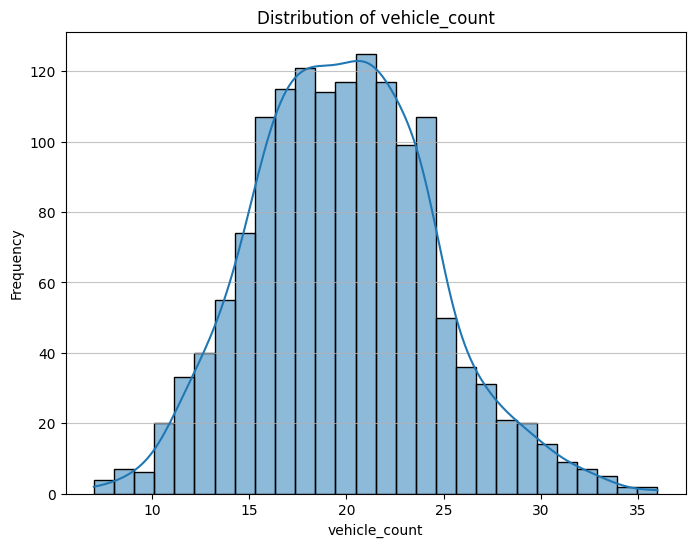

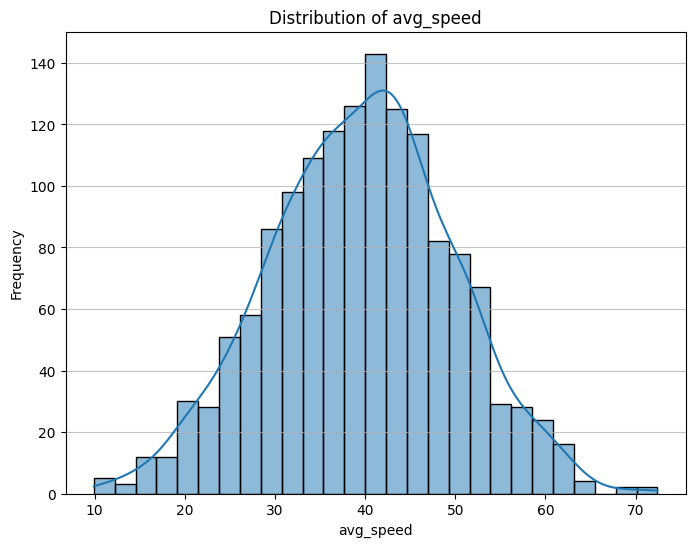

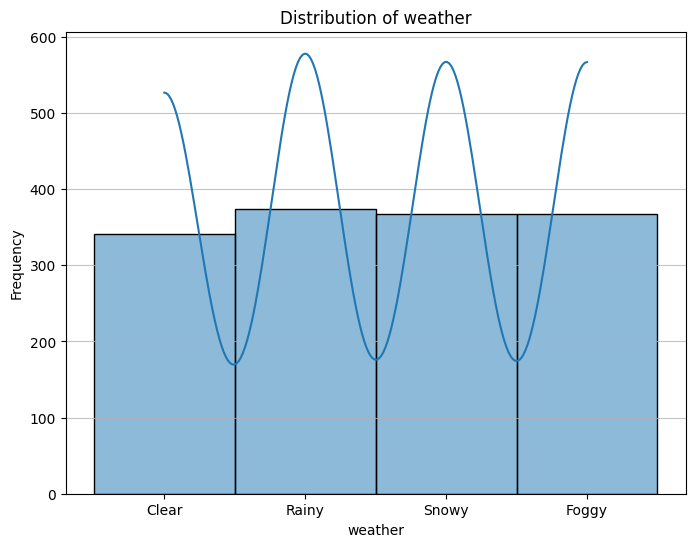

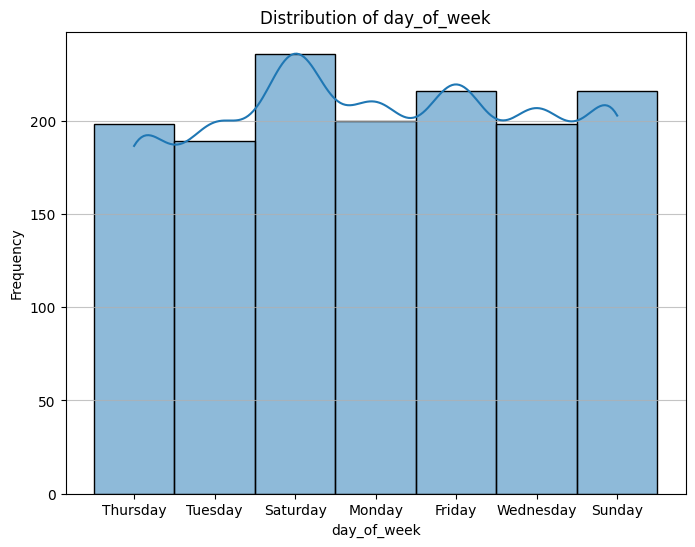

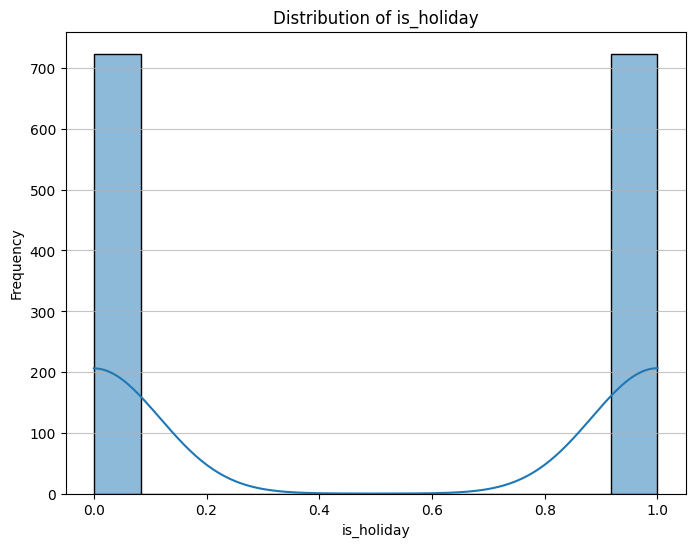

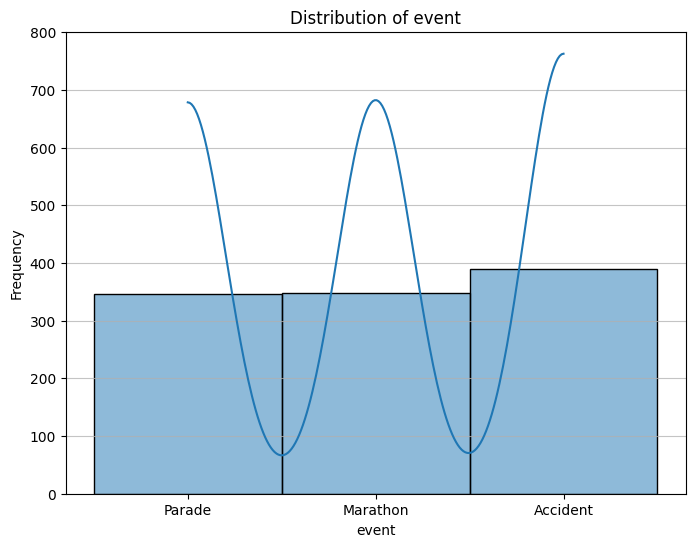

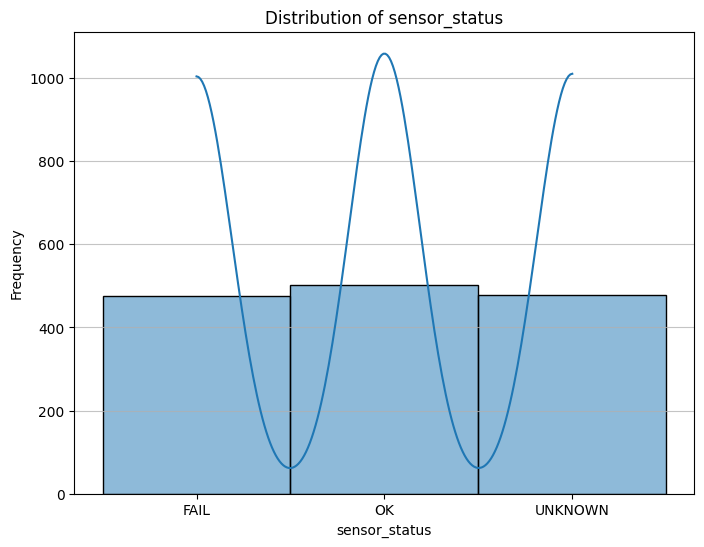

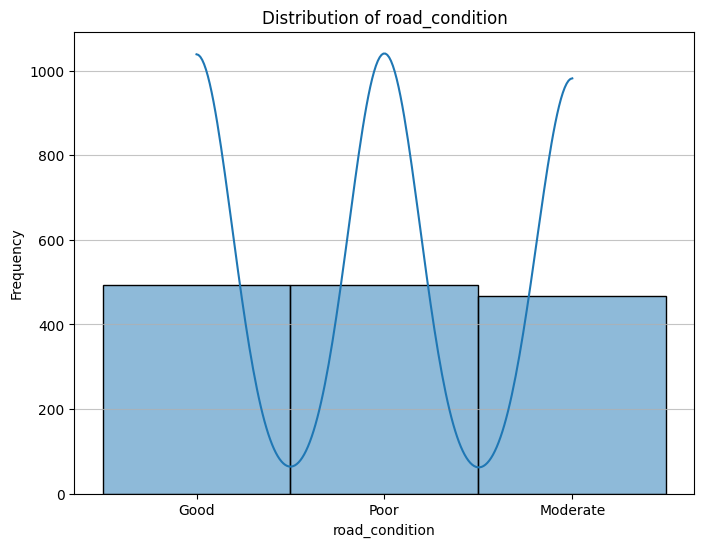

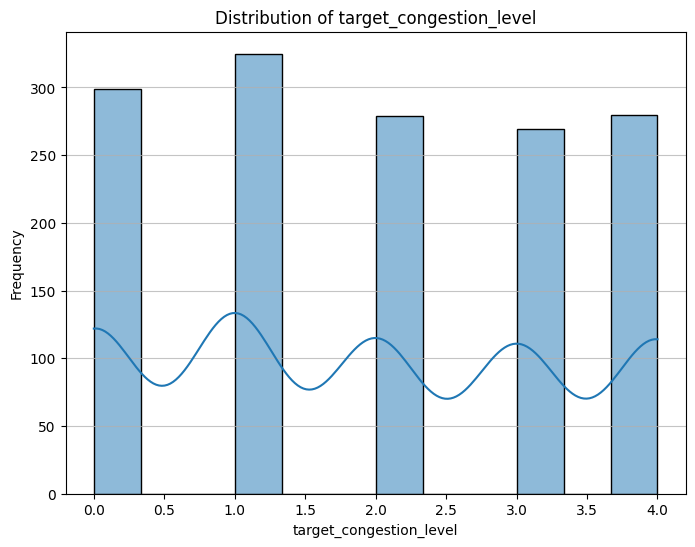

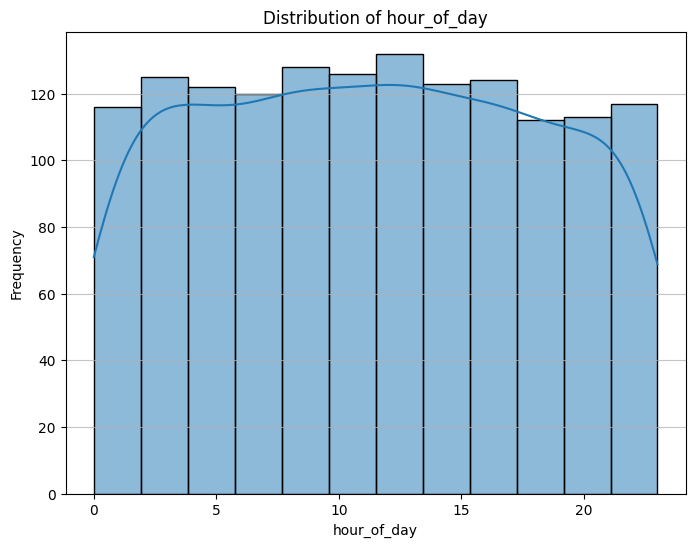

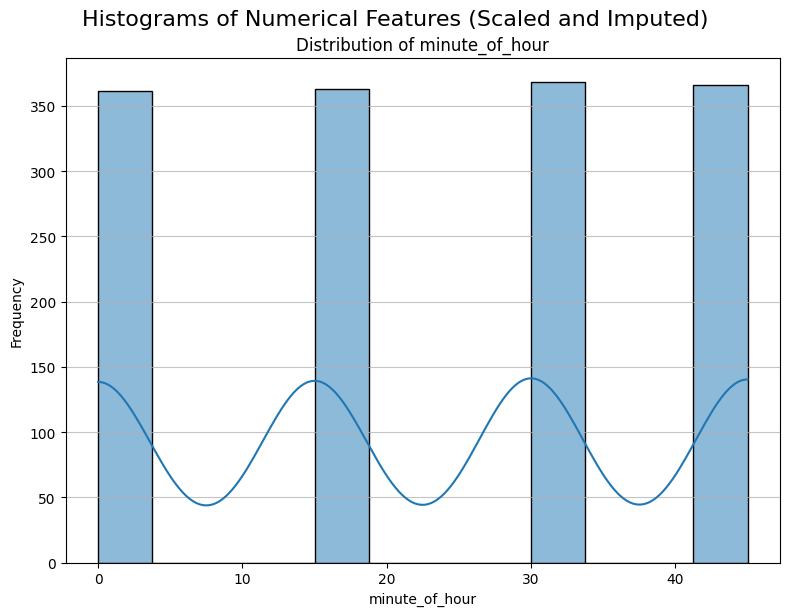

Histograms generated.



In [400]:

print("Generating Histograms for Numerical Features...")

# Identify actual numerical columns from the original list, as they are at the end of imputed_df_processed
# You might need to adjust 'numerical_cols' if your original list was not exactly what ended up in the final DF
# For example, if 'target_congestion_level' is your target, you might want to exclude it from feature plots.
# Let's assume the numerical_cols list from your previous code is accurate for this purpose.
# Ensure these columns exist in imputed_df_processed
numerical_cols_in_processed_df = [col for col in ['hour_of_day', 'minute_of_hour', 'target_congestion_level', 'vehicle_count', 'is_holiday', 'avg_speed'] if col in data.columns]

# Create subplots for better organization
n_numeric_features = len(data.columns)
# Determine grid size for subplots
cols_per_row = 3
rows_needed = (n_numeric_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, rows_needed * 4)) # Adjust figure size dynamically

for i, col in enumerate(data.columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjusts subplot params for a tight layout
plt.suptitle('Histograms of Numerical Features (Scaled and Imputed)', y=1.02, fontsize=16) # Overall title
plt.show()
print("Histograms generated.\n")



In [401]:
df_cleaned.head(10)

,timestamp,hour_of_day,minute_of_hour,target_congestion_level,vehicle_count,is_holiday,avg_speed,location_id,sensor_status,event,day_of_week,weather,road_condition
0,2023-01-01 03:00:00,-1.231046,-1.349282,-1.368457,0.683777,-1.000691,0.115698,ENT002,FAIL,Parade,Thursday,Clear,Good
1,2023-01-01 03:15:00,-1.231046,-0.453855,-0.661340,-1.067796,-1.000691,-0.165340,GUL004,FAIL,Parade,Tuesday,Rainy,Poor
2,2023-01-01 03:30:00,-1.231046,0.441572,0.045778,0.245884,0.999309,-0.896701,GUL004,OK,Marathon,Saturday,Clear,Moderate
3,2023-01-01 03:45:00,-1.231046,1.336999,-1.368457,1.121670,-1.000691,0.121080,MBR003,UNKNOWN,Accident,Monday,Rainy,Poor
4,2023-01-01 04:00:00,-1.084383,-1.349282,-0.661340,-1.067796,-1.000691,0.299318,GUL004,OK,Marathon,Friday,Snowy,Moderate
5,2023-01-01 04:30:00,-1.084383,0.441572,0.752895,-0.192010,-1.000691,0.374879,ENT002,UNKNOWN,Accident,Wednesday,Foggy,Good
6,2023-01-01 04:45:00,-1.084383,1.336999,0.045778,0.245884,0.999309,-0.109032,MBR003,OK,Parade,Friday,Clear,Poor
7,2023-01-01 05:00:00,-0.937720,-1.349282,1.460012,-0.629903,-1.000691,-1.841802,KLA001,FAIL,Accident,Friday,Rainy,Moderate
8,2023-01-01 05:15:00,-0.937720,-0.453855,0.045778,-0.192010,-1.000691,-0.806200,ENT002,FAIL,Accident,Thursday,Foggy,Moderate
9,2023-01-01 05:30:00,-0.937720,0.441572,1.460012,-0.848850,0.999309,-0.364463,KLA001,FAIL,Accident,Saturday,Snowy,Good


Generating Scatter Plots for Key Numerical Feature Pairs...


<Figure size 1500x500 with 0 Axes>

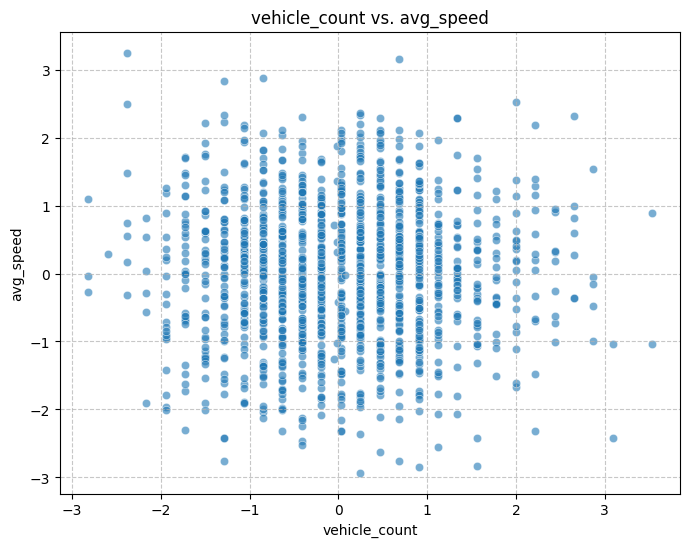

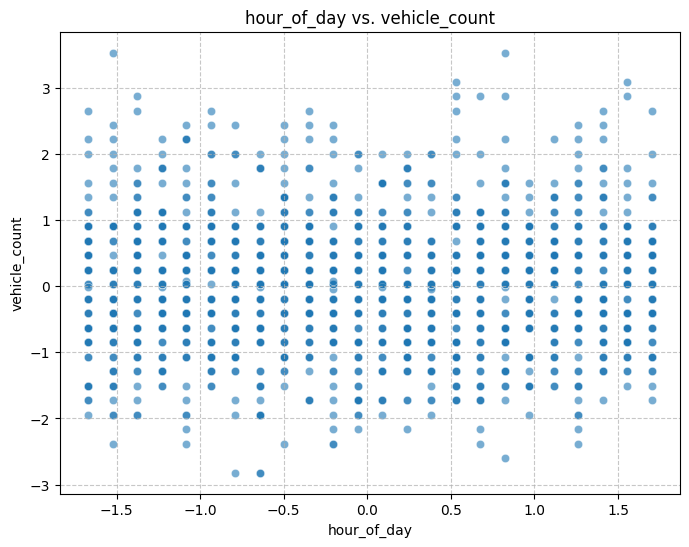

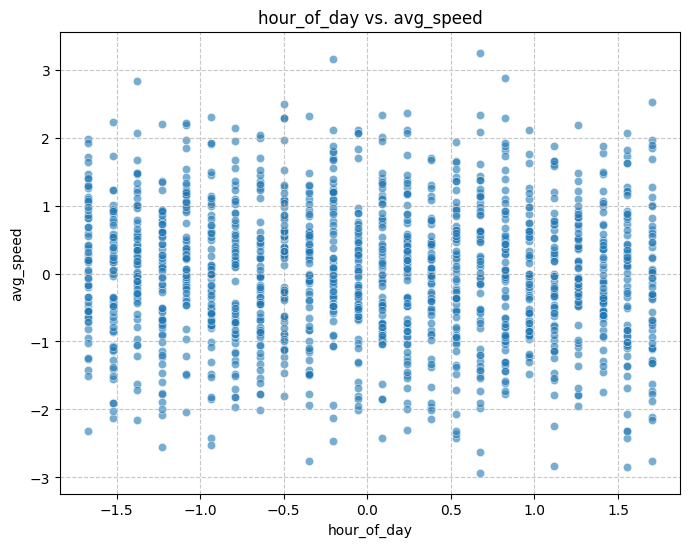

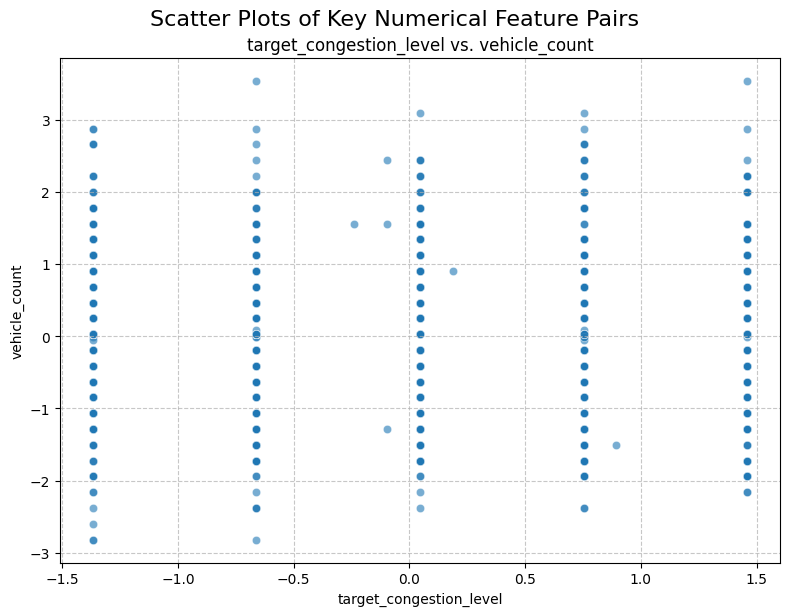

Scatter plots generated.



In [402]:
print("Generating Scatter Plots for Key Numerical Feature Pairs...")
scatter_pairs = [
    ('vehicle_count', 'avg_speed'),
    ('hour_of_day', 'vehicle_count'),
    ('hour_of_day', 'avg_speed'),  
    ('target_congestion_level', 'vehicle_count')
]

plt.figure(figsize=(15, 5)) 

for i, (x_col, y_col) in enumerate(scatter_pairs):
    if x_col in imputed_df_processed.columns and y_col in imputed_df_processed.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=imputed_df_processed[x_col], y=imputed_df_processed[y_col], alpha=0.6)
        plt.title(f'{x_col} vs. {y_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        print(f"Warning: Columns '{x_col}' or '{y_col}' not found for scatter plot.")

plt.tight_layout()
plt.suptitle('Scatter Plots of Key Numerical Feature Pairs', y=1.02, fontsize=16)
plt.show()
print("Scatter plots generated.\n")





Generating Correlation Heatmap...


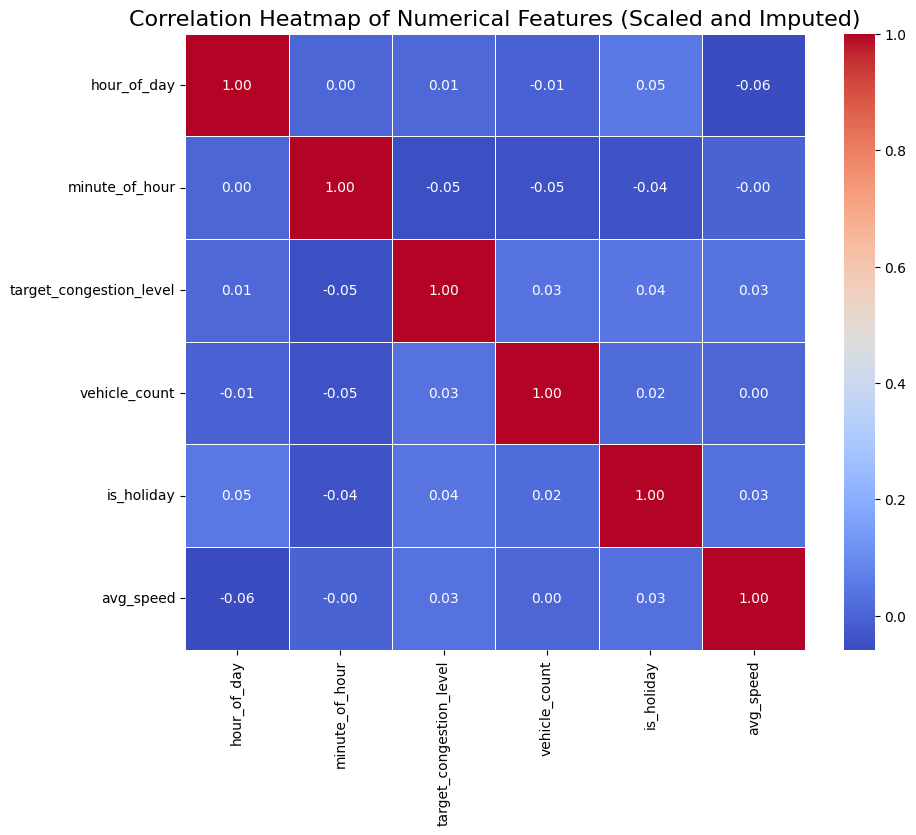

Correlation heatmap generated.

All requested visualizations have been generated.


In [ ]:
print("Generating Correlation Heatmap...")

# Calculate the correlation matrix for all numerical features
# It's usually best to correlate only numerical features for a clear heatmap.
# The one-hot encoded columns are binary and can be included, but might make the heatmap very large.
# Let's create a DataFrame with just the numerical features for a focused correlation heatmap.
numerical_df_for_corr = imputed_df_processed[numerical_cols_in_processed_df]

correlation_matrix = numerical_df_for_corr.corr()

plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features (Scaled and Imputed)', fontsize=16)
plt.show()
print("Correlation heatmap generated.\n")



Generating Categorical Pair Visualizations...
Generating Event vs. Road Condition heatmap...


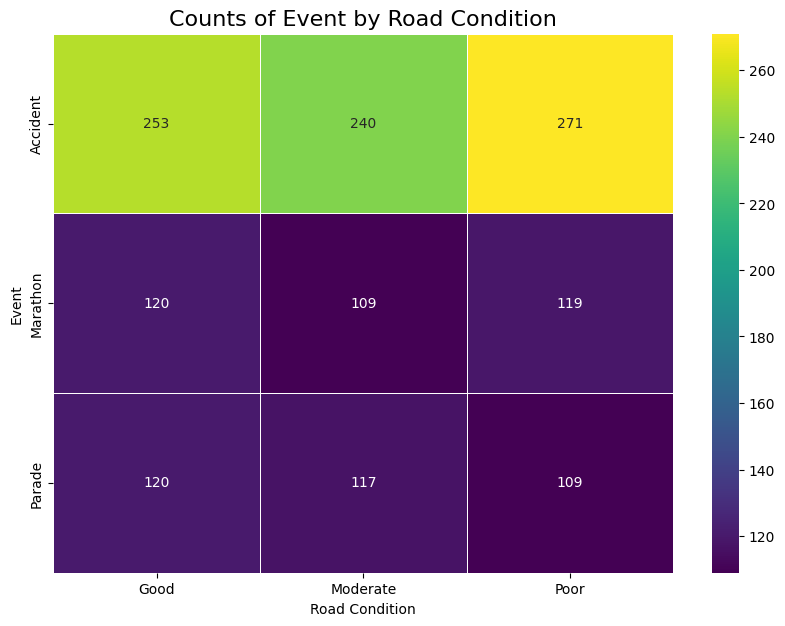

Event vs. Road Condition heatmap generated.

Generating Road Condition vs. Weather heatmap...


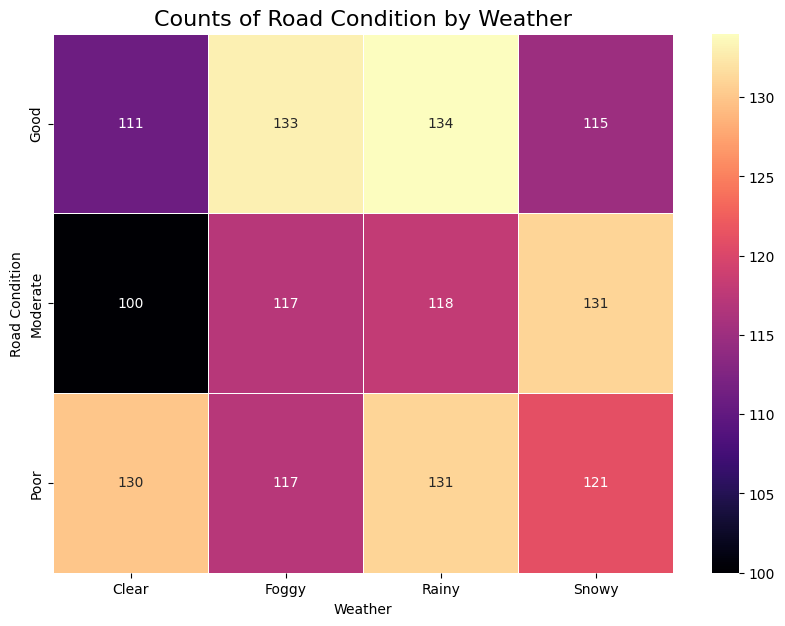

Road Condition vs. Weather heatmap generated.

Generating Events during Rainy Weather plot...


C:\Users\MAKOS\AppData\Local\Temp\ipykernel_6724\2727901293.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




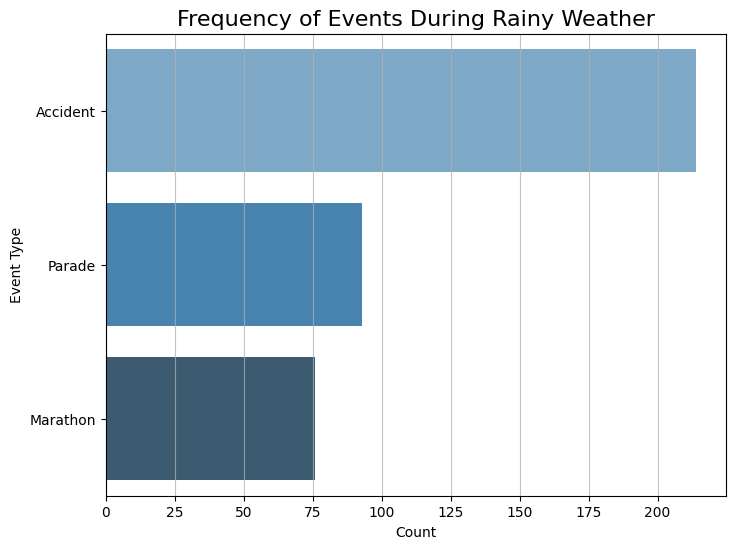

Events during Rainy Weather plot generated.

All requested visualizations have been generated.


In [404]:

print("Generating Categorical Pair Visualizations...")

# Ensure inverse_transformed_categories_df is available and has the necessary columns
if 'event' in inverse_transformed_categories_df.columns and \
   'road_condition' in inverse_transformed_categories_df.columns and \
   'weather' in inverse_transformed_categories_df.columns:

    # Pair 1: Event vs. Road Condition
    print("Generating Event vs. Road Condition heatmap...")
    event_road_crosstab = pd.crosstab(inverse_transformed_categories_df['event'],
                                      inverse_transformed_categories_df['road_condition'])
    plt.figure(figsize=(10, 7))
    sns.heatmap(event_road_crosstab, annot=True, cmap='viridis', fmt='d', linewidths=.5)
    plt.title('Counts of Event by Road Condition', fontsize=16)
    plt.xlabel('Road Condition')
    plt.ylabel('Event')
    plt.show()
    print("Event vs. Road Condition heatmap generated.\n")

    # Pair 2: Road Condition vs. Weather
    print("Generating Road Condition vs. Weather heatmap...")
    road_weather_crosstab = pd.crosstab(inverse_transformed_categories_df['road_condition'],
                                        inverse_transformed_categories_df['weather'])
    plt.figure(figsize=(10, 7))
    sns.heatmap(road_weather_crosstab, annot=True, cmap='magma', fmt='d', linewidths=.5)
    plt.title('Counts of Road Condition by Weather', fontsize=16)
    plt.xlabel('Weather')
    plt.ylabel('Road Condition')
    plt.show()
    print("Road Condition vs. Weather heatmap generated.\n")

    # Visualization for "what events occur mostly when it's rainy"
    print("Generating Events during Rainy Weather plot...")
    rainy_events = inverse_transformed_categories_df[
        inverse_transformed_categories_df['weather'] == 'Rainy'
    ]
    if not rainy_events.empty:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=rainy_events, y='event', order=rainy_events['event'].value_counts().index, palette='Blues_d')
        plt.title('Frequency of Events During Rainy Weather', fontsize=16)
        plt.xlabel('Count')
        plt.ylabel('Event Type')
        plt.grid(axis='x', alpha=0.75)
        plt.show()
        print("Events during Rainy Weather plot generated.\n")
    else:
        print("No 'Rainy' weather events found in the data to plot.")

else:
    print("Skipping categorical pair visualizations: Required columns (event, road_condition, weather) not found in inverse_transformed_categories_df.")

print("All requested visualizations have been generated.")
